<a href="https://colab.research.google.com/github/Kaicv27/Final.Project.Kai.Steven/blob/main/Copy_of_Grade_Predictor_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

data = pd.read_csv("student-mat2.csv") #import the file
data.head() #read and print out the first 5 rows of the file

X = data[["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences","G1", "G2"]]
y = data["G3"]

best = 0
acc_total = 0
train_time = 100
for result in range(train_time):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

  clf = KNeighborsRegressor(9)
  clf.fit(X_train, y_train)

  # print(X_test, type(X_test))
  y_pred = clf.predict(X_test)
  acc = clf.score(X_test, y_test)

  print(acc)
  acc_total += acc

  if acc > best:
    best = acc
    import joblib
    joblib.dump(clf, "final_knn_model.pkl")
    with open("final_knn_model.pickle", "wb") as f:
      pickle.dump(KNeighborsRegressor, f) #save a pickle file

pickle_in = open("final_knn_model.pickle", "rb")
KNeighborsRegressor = pickle.load(pickle_in)

print('The average accuracy is: ' + str(acc_total/train_time))
print("The mean squared error is: ", mean_squared_error(y_test, y_pred))



0.7684663242724122
0.7795268146257297
0.8558119817192961
0.7766883166898201
0.885239369738388
0.8915076692854471
0.9095468889814691
0.8538615744731619
0.7821411528247969
0.8743173759237561
0.8130926494989248
0.9211842024445673
0.882741201321192
0.93163482590626
0.8101874876476003
0.8866421104987202
0.8683771119668555
0.838644182028439
0.7985779565957218
0.8301686039078946
0.8206637365597131
0.8540479984397319
0.83462702597149
0.6972784847191895
0.672177772194261
0.870139710471607
0.8495686051139372
0.8614494201902858
0.924718670458275
0.7278375595225755
0.806822483772693
0.8221152312452916
0.8876476607390454
0.7074122313170568
0.9169866846982475
0.9262163835320383
0.8220575330279971
0.8521399176954733
0.8569651050814989
0.8528830251829131
0.8423215562472022
0.9322473458140854
0.8438660322791305
0.8807636356166584
0.8996179882999745
0.8433420365535248
0.8433942600609268
0.8507538648558225
0.8304672635872373
0.8376267781342147
0.7620812457877179
0.8148649597336302
0.890510885183963
0.799

In [ ]:
import numpy as np
clf2 = joblib.load("model.pkl")
a = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
a = np.array(a)
df = pd.DataFrame(np.array(a), columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences","G1", "G2", "G3"])
y_pred = clf2.predict(df)
y_pred

array([0.55555556])

<ipython-input-3-1d019d40e2d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-3-1d019d40e2d8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


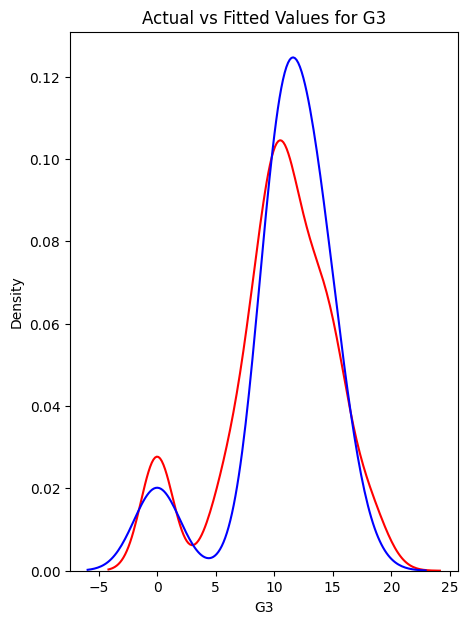

In [ ]:
# plot graph
plt.figure(figsize=(5, 7))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for G3')

plt.show()
plt.close()